In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [4]:
A.shape

(178, 14)

In [5]:
A.columns

Index(['Cultivator', 'Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [0]:
A.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
from scipy.stats import f_oneway

In [0]:
A['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [0]:
g1=A[A['Cultivator']==1]
g2=A[A['Cultivator']==2]
g3=A[A['Cultivator']==3]


In [11]:
f_oneway(g1['Ash'],g2['Ash'],g3['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

In [0]:
X=A.drop('Cultivator',axis=1)
Y=A['Cultivator']


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [0]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [19]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [22]:
GS.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

In [0]:
dt=DecisionTreeClassifier(random_state=0)

In [27]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=GridSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depre...
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 

In [28]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8}

In [0]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=43,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=8,random_state=0)
RF=RandomForestClassifier(criterion='gini',n_estimators=34,random_state=0)
Bag=BaggingClassifier(n_estimators=26,random_state=0)
AB=AdaBoostClassifier(n_estimators=10,random_state=0)
#ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=0)
GB=GradientBoostingClassifier(n_estimators=59)


In [0]:
from sklearn.ensemble import VotingClassifier
stacked = VotingClassifier(estimators = [('Logistic',LR),
                                         ('RandomForest', RF), 
                                         ('GBoost',GB)],voting='soft')


In [0]:
RF_var=[]
for val in np.arange(1,50):
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, X_std, Y,cv=kfold, scoring='f1_weighted')
  RF_var.append(np.var(cv_results,ddof=1))
  

In [38]:
RF_var[33:38]

[0.0002909952081068323,
 0.0002909952081068323,
 0.0002909952081068323,
 0.0006784794121035837,
 0.0006784794121035837]

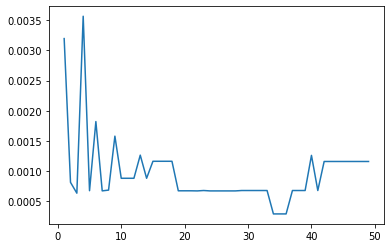

In [34]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

In [0]:
Bag_var=[]
for val in np.arange(1,100):
  Bag=BaggingClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Bag, X_std, Y,cv=kfold, scoring='f1_weighted')
  Bag_var.append(np.var(cv_results,ddof=1))
  #print(val,np.var(cv_results,ddof=1))

	

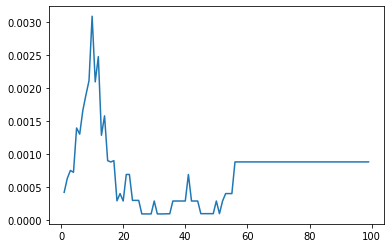

In [40]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Bag_var)

In [41]:
np.argmin(Bag_var)

25

In [42]:
Ada_bias=[]
for val in np.arange(1,100):
  Ada=AdaBoostClassifier(base_estimator=LR,n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Ada, X_std, Y,cv=kfold, scoring='f1_weighted')
  Ada_bias.append(1-np.mean(cv_results))
  print(val,1-np.mean(cv_results))


1 0.02273244823990339
2 0.02273244823990339
3 0.02273244823990339
4 0.02273244823990339
5 0.02273244823990339
6 0.02273244823990339
7 0.02273244823990339
8 0.02273244823990339
9 0.02273244823990339
10 0.02273244823990339
11 0.02273244823990339
12 0.02273244823990339
13 0.02273244823990339
14 0.028279354772798526
15 0.028279354772798526
16 0.028279354772798526
17 0.028279354772798526
18 0.028279354772798526
19 0.028279354772798526
20 0.03382055498018399
21 0.03382055498018399
22 0.03382055498018399
23 0.03382055498018399
24 0.03382055498018399
25 0.03382055498018399
26 0.03382055498018399
27 0.03382055498018399
28 0.03382055498018399
29 0.03382055498018399
30 0.039373275113288586
31 0.039373275113288586
32 0.039373275113288586
33 0.039373275113288586
34 0.039373275113288586
35 0.039373275113288586
36 0.039373275113288586
37 0.039373275113288586
38 0.039373275113288586
39 0.039373275113288586
40 0.039373275113288586
41 0.039373275113288586
42 0.039373275113288586
43 0.039373275113288586


In [0]:
Ada_dt=[]
for val in np.arange(1,100):
  Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Ada, X_std, Y,cv=kfold, scoring='f1_weighted')
  Ada_dt.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))


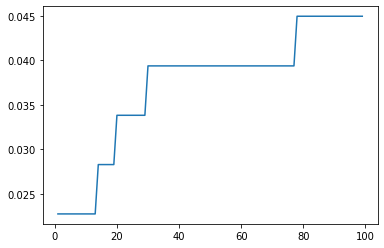

In [43]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Ada_bias)

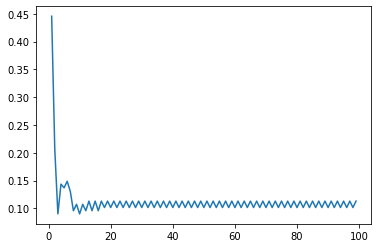

In [46]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Ada_dt)

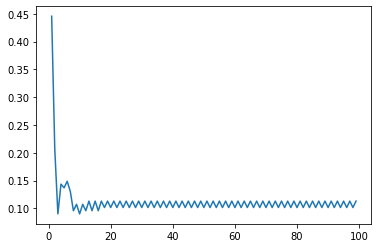

In [50]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Ada_dt)

In [47]:
np.argmin(Ada_dt)

9

In [48]:
Ada_dt[8:12]

[0.10741851947284065,
 0.09012909194935892,
 0.10741851947284065,
 0.09589055004437907]

In [0]:
GB_bias=[]
for val in np.arange(1,200):
  gb=GradientBoostingClassifier(n_estimators=val)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(gb, X_std, Y,cv=kfold, scoring='f1_weighted')
  GB_bias.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))


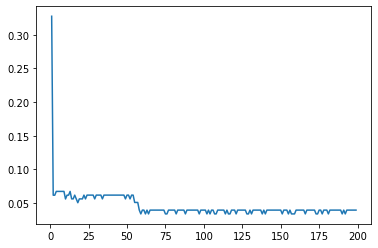

In [52]:
x_axis=np.arange(1,200)
plt.plot(x_axis,GB_bias)

In [53]:
np.argmin(GB_bias)

58

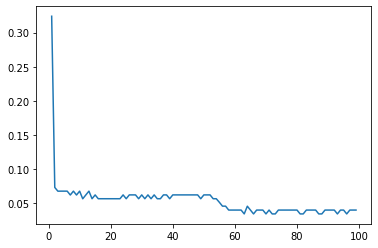

In [0]:
x_axis=np.arange(1,100)
plt.plot(x_axis,GB_bias[:99])

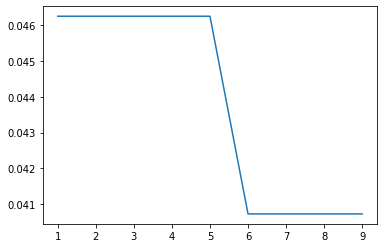

In [0]:
x_axis=np.arange(1,10)
plt.plot(x_axis,Ada_bias[:9])

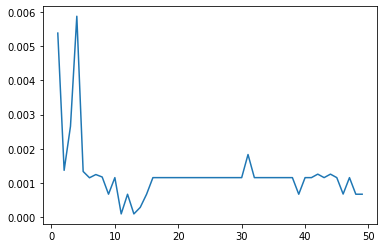

In [0]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

In [0]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bag))
models.append(('AdaBoost',AB))
models.append(('BoostedLR',ABL))
models.append(('GBoost',GB))
#models.append(('Stacked',stacked))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.948733 (0.002699)
DecisionTree: 0.882514 (0.000837)
RandomForest: 0.966122 (0.000291)
BaggingClassifier: 0.955157 (0.000095)
AdaBoost: 0.909871 (0.000425)
BoostedLR: 0.960627 (0.000377)
GBoost: 0.966200 (0.000000)


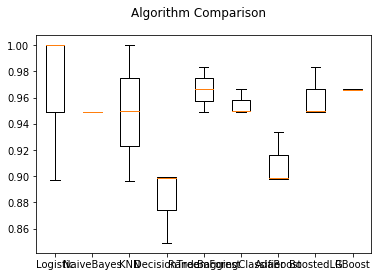

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
eig_vals

array([3.05722982, 1.85240823, 1.54381641, 1.16433347, 0.08525789,
       0.18847591, 0.34488106, 0.46869404, 0.63732855, 0.66383244])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.55317854  49.06567605  64.49418525  76.13023832  82.76441121
  89.13371092  93.81772014  97.26437393  99.14795431 100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:9]).transpose()

In [0]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(1599, 9)

In [0]:
Proj_data_df=pd.DataFrame(Proj_data)
Proj_data_df['labels']=Y


In [0]:
PD=Proj_data_df.groupby('labels')
PD3=PD.get_group(3)
PD4=PD.get_group(4)
PD5=PD.get_group(5)
PD6=PD.get_group(6)
PD7=PD.get_group(7)
PD8=PD.get_group(8)


In [0]:
PD3_test=PD3.iloc[:3,:]
PD4_test=PD4.iloc[:7,:]
PD5_test=PD5.iloc[:42,:]
PD6_test=PD6.iloc[:25,:]
PD7_test=PD7.iloc[:15,:]
PD8_test=PD8.iloc[:4,:]


In [0]:
PD3_test.shape

(3, 10)

In [0]:
df_prod=pd.concat([PD3_test,PD4_test,PD5_test,PD6_test,PD7_test,PD8_test])
df_prod.shape

(96, 10)

In [0]:
df_prod_x=df_prod.iloc[:,:-1]
true_y=df_prod.iloc[:,-1]

In [0]:
true_y.shape

(96,)

In [0]:
PD3_train=PD3.iloc[3:,:]
PD4_train=PD4.iloc[7:,:]
PD5_train=PD5.iloc[42:,:]
PD6_train=PD6.iloc[25:,:]
PD7_train=PD7.iloc[15:,:]
PD8_train=PD8.iloc[4:,:]

In [0]:
df_train=pd.concat([PD3_train,PD4_train,PD5_train,PD6_train,PD7_train,PD8_train])
df_train.shape

(1503, 10)

In [0]:
X_train=df_train.drop('labels',axis=1)
X_train.shape

(1503, 9)

In [0]:
Y_train=df_train['labels']
Y_train.shape

(1503,)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier



In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [0]:
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
#stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('RF', RF)],voting='soft')

In [0]:
models = []
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
#models.append(('VotingClassifier',stacked))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

RandomForest: 0.661427 (0.036417)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

Bagged: 0.682821 (0.037888)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

AdaBoostRF: 0.687803 (0.046759)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

GradientBoost: 0.668373 (0.038388)


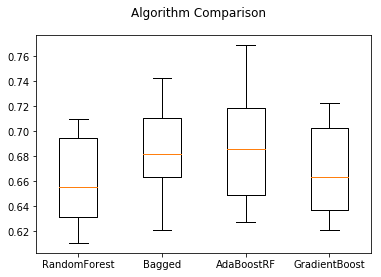

In [0]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
GBoost.fit(X_train,Y_train)
AB_RF.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                      

In [0]:
GB_pred=GBoost.predict(df_prod_x)
AB_pred=AB_RF.predict(df_prod_x)

In [0]:
from sklearn import metrics
GB_cm=metrics.confusion_matrix(true_y,GB_pred)
AB_cm=metrics.confusion_matrix(true_y,AB_pred)

print(GB_cm)

[[ 0  2  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 32 10  0  0]
 [ 0  0 15 10  0  0]
 [ 0  0  4 10  1  0]
 [ 0  0  0  1  3  0]]


In [0]:
print(AB_cm)

[[ 0  0  2  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 29 13  0  0]
 [ 0  0 18  7  0  0]
 [ 0  0  4 10  1  0]
 [ 0  0  0  3  1  0]]


In [0]:
GB_cr=metrics.classification_report(true_y,GB_pred)
AB_cr=metrics.classification_report(true_y,AB_pred)
print(GB_cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.56      0.76      0.65        42
           6       0.30      0.40      0.34        25
           7       0.25      0.07      0.11        15
           8       0.00      0.00      0.00         4

    accuracy                           0.45        96
   macro avg       0.19      0.20      0.18        96
weighted avg       0.36      0.45      0.39        96



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print(AB_cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.49      0.69      0.57        42
           6       0.20      0.28      0.23        25
           7       0.50      0.07      0.12        15
           8       0.00      0.00      0.00         4

    accuracy                           0.39        96
   macro avg       0.20      0.17      0.15        96
weighted avg       0.35      0.39      0.33        96



In [0]:
Y_pred=pd.DataFrame(y_pred)

In [0]:
idx=np.arange(len(y_pred))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

In [0]:
Y_pred.index=idx
Y_true.index=idx

In [0]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_pred,Y_true)
print(cm)

[[45  0]
 [ 0 24]]
